**Student Name - Mohit Patil**

**Registered Email Id - mohitz4418@gmail.com** 

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/",
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "training"
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/", 
    batch_size = 32, image_size = (img_height, img_width), 
    seed = 123, validation_split = 0.2, subset = "validation"
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

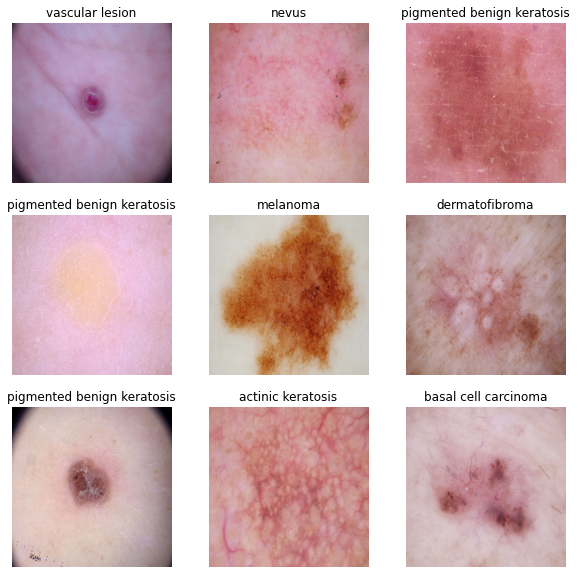

In [10]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
### Your code goes here

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# View the summary of all layers

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 90, 90, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0

### Train the model

In [16]:
epochs = 20
history = model.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 21s 105ms/step - loss: 5.3236 - accuracy: 0.2976 - val_loss: 5.6772 - val_accuracy: 0.0537
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 1.5049 - accuracy: 0.4613 - val_loss: 9.1347 - val_accuracy: 0.0783
Epoch 3/20
56/56 [==============================] - 2s 33ms/step - loss: 1.2826 - accuracy: 0.5393 - val_loss: 10.9798 - val_accuracy: 0.1298
Epoch 4/20
56/56 [==============================] - 2s 33ms/step - loss: 1.1825 - accuracy: 0.5791 - val_loss: 12.8758 - val_accuracy: 0.1051
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.1816 - accuracy: 0.5699 - val_loss: 11.9908 - val_accuracy: 0.1834
Epoch 6/20
56/56 [==============================] - 2s 32ms/step - loss: 1.1190 - accuracy: 0.6139 - val_loss: 8.6671 - val_accuracy: 0.1588
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 0.8922 - accuracy: 0.6495 - val_loss: 6.3961 - val_accuracy: 0.2013
Epoch 8/

### Visualizing training results

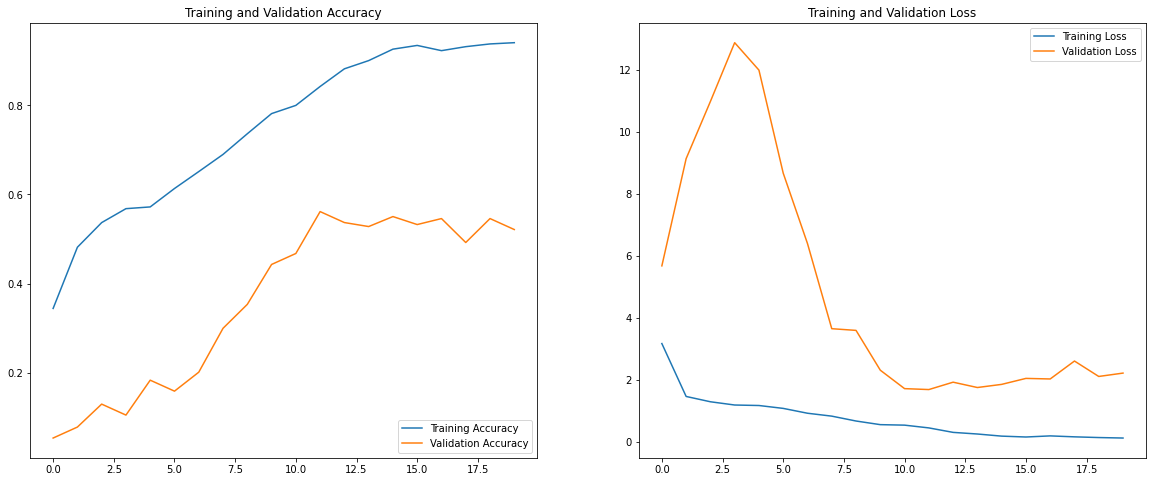

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

- As you can see from the plots, training accuracy and validation accuracy are off by large margin and the model has achieved only around 60% accuracy on the validation set.
- The plot also shows that due to the large margin between accuracy of training data and validation data the model is overfitted.
- There are multiple ways to fight overfitting in the training process. Here we will use the data augmentation and dropouts for this model.

In [18]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

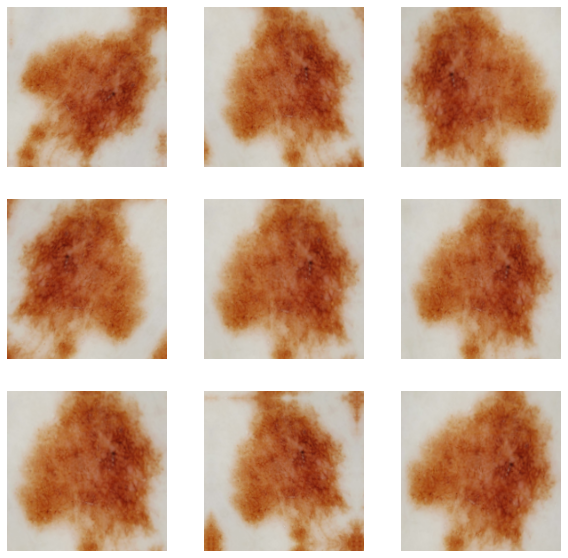

In [19]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [20]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

### Compiling the model




In [21]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 90, 90, 32)       

### Training the model

In [23]:
## Your code goes here, note: train your model for 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20
56/56 [==============================] - 3s 43ms/step - loss: 5.4914 - accuracy: 0.3141 - val_loss: 27.7388 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 2s 40ms/step - loss: 1.7006 - accuracy: 0.4228 - val_loss: 45.1573 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 2s 40ms/step - loss: 1.5939 - accuracy: 0.4842 - val_loss: 52.0837 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4907 - accuracy: 0.4951 - val_loss: 50.9229 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4487 - accuracy: 0.5009 - val_loss: 40.7137 - val_accuracy: 0.1499
Epoch 6/20
56/56 [==============================] - 2s 40ms/step - loss: 1.3729 - accuracy: 0.5318 - val_loss: 32.5452 - val_accuracy: 0.1566
Epoch 7/20
56/56 [==============================] - 2s 40ms/step - loss: 1.4112 - accuracy: 0.5069 - val_loss: 18.8475 - val_accuracy: 0.2237
Epoch 

### Visualizing the results

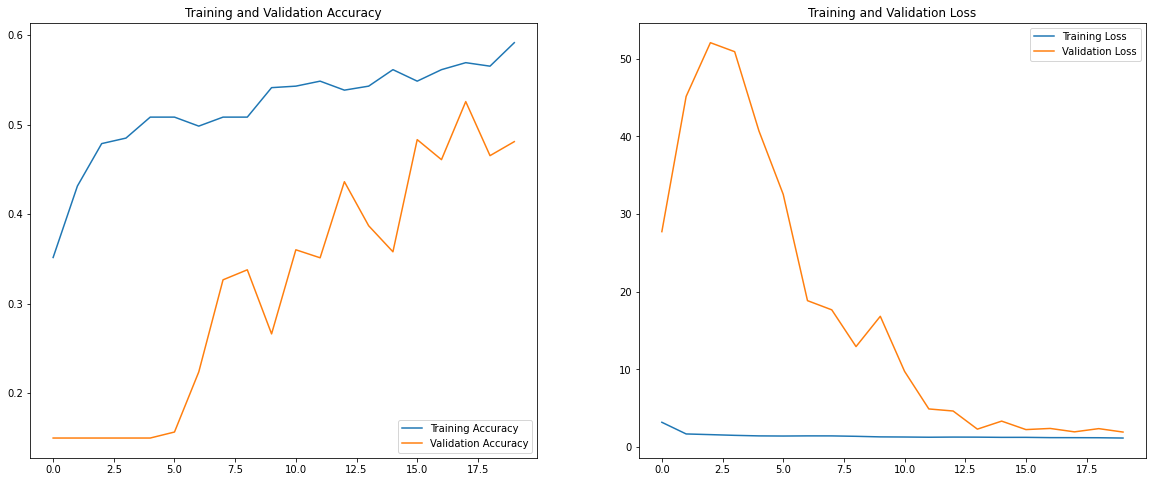

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

- As we can observe from above plot after the data augmentation the mrgin between the accuracy of training data and validation data is reduced.
- Model has accuracy around 55 percent for both training and validation data.
- So from above plot we can observe that the issue of overfitting is somewhat in control now.
- We can increase the accuracy for this model by changing in layers, adding data augmentation layer and droputs for preventing from further overfitting.
- Also we can check for class imbalance and if there is any class imbalaced between training data we can handle it by using augmentor so the accuracy of model will increase.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [25]:
# get the count of class names by its path for each class.

N = 0 #Total count of number of files in all directories
for dirpath, dirnames, filenames in os.walk(data_dir_train):
    N += len(filenames)
    print("Files in", dirpath, "-" ,len(filenames))
print("Total files", N)

Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train - 0
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion - 139
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/basal cell carcinoma - 376
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma - 438
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/squamous cell carcinoma - 181
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/nevus - 357
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/dermatofibroma - 95
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/actinic keratosis - 114
Files in /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/pigmented benign keratosis - 462
Files in /content/drive/MyDrive/Collab_

In [26]:
# Creating dataframe for class name and its count.

Data = pd.DataFrame({"Class_Name" : ["actinic keratosis", "vascular lesion", "basal cell carcinoma", "melanoma", "squamous cell carcinoma", "nevus", "dermatofibroma", "pigmented benign keratosis", "seborrheic keratosis"],
                     "Class_Count" : [114, 139, 376, 438, 181, 357, 95, 462, 77]})
Data.head()

,Class_Name,Class_Count
0,actinic keratosis,114
1,vascular lesion,139
2,basal cell carcinoma,376
3,melanoma,438
4,squamous cell carcinoma,181


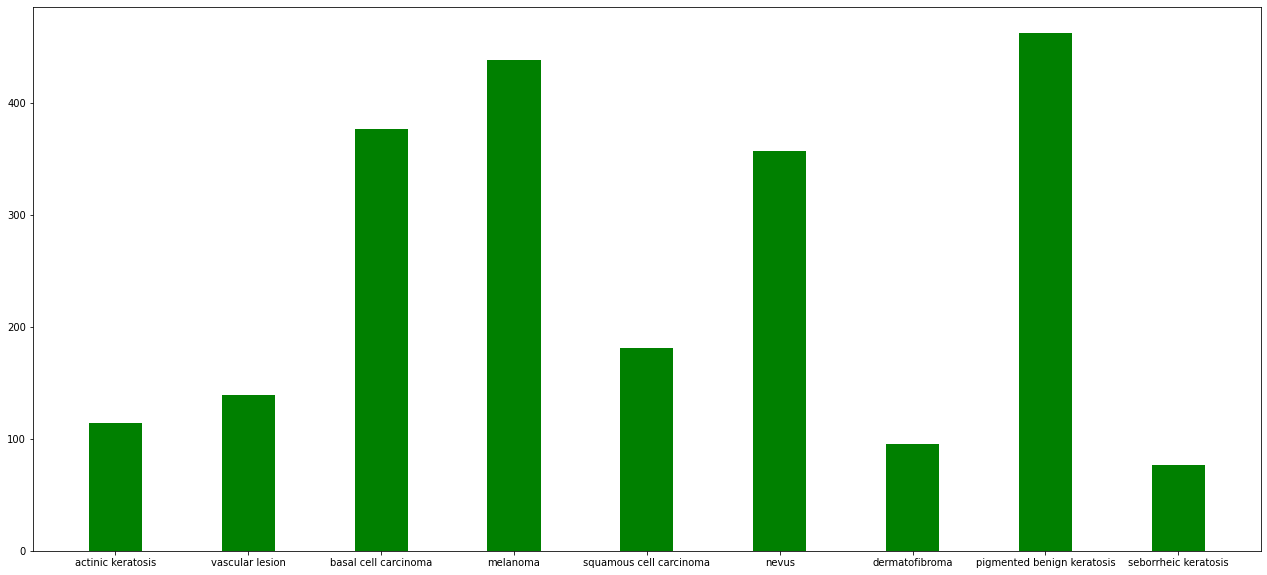

In [27]:
fig = plt.figure(figsize = (22, 10))
plt.bar(Data.Class_Name, Data.Class_Count, color = "green", width = 0.4)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
### <u>Answer</u> - The class <b>"seborrheic keratosis"</b> has least number of samples ie. 77
#### - Which classes dominate the data in terms proportionate number of samples?
### <u>Answer</u> - The class <b>"pigmented benign keratosis"</b> dominates the data as it contains 462 samples.

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset="/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9CC462CF50>: 100%|██████████| 500/500 [00:17<00:00, 27.93 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D22A57B50>: 100%|██████████| 500/500 [00:18<00:00, 27.38 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D22A3B550>: 100%|██████████| 500/500 [00:18<00:00, 26.41 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=722x542 at 0x7F9CB838DC90>: 100%|██████████| 500/500 [01:25<00:00,  5.87 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F9CB836F5D0>: 100%|██████████| 500/500 [01:23<00:00,  6.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F9D22999950>: 100%|██████████| 500/500 [00:18<00:00, 26.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F9CB8393C50>: 100%|██████████| 500/500 [00:41<00:00, 11.95 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9CB9845C90>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9D22A14C50>: 100%|██████████| 500/500 [00:18<00:00, 27.05 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F9CB9848990>: 100%|██████████| 500/500 [00:18<00:00, 26.64 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
from glob import glob

path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0028680.jpg_0094d82c-2baa-45c9-976c-92960fcc4906.jpg',
 '/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0033749.jpg_a6e2fcca-3dba-4e15-964b-f43cb764f036.jpg',
 '/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0027790.jpg_91017feb-d314-4644-b6dd-021b5b710bb9.jpg',
 '/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0033991.jpg_5e5cfc20-3594-422b-8f57-a30b9fa026c8.jpg',
 '/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/vascular lesion/output/vascular lesion_original_ISIC_0029742.jpg_949a795a-a0b5-4980-bcb5-9247101dfd2c.jpg',
 '/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [33]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [34]:
original_df = pd.DataFrame(path_list, lesion_list_new)

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [36]:
new_df['Label'].value_counts()

seborrheic keratosis          500
melanoma                      500
squamous cell carcinoma       500
actinic keratosis             500
basal cell carcinoma          500
pigmented benign keratosis    500
dermatofibroma                500
vascular lesion               500
nevus                         500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train="/content/drive/MyDrive/Collab_Python_Notebooks/CNN_Skin_Cancer/Dataset/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
## your code goes here

model = Sequential([

  layers.experimental.preprocessing.Rescaling(1./255),
  
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),

  layers.Flatten(),
  
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [41]:
## your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [42]:
#epochs = 30
## Your code goes here, use 30 epochs.
#history = # your model fit code

epochs = 30
history = model.fit(
    train_ds,
    validation_data = val_ds, 
    epochs = epochs
)

Epoch 1/30
169/169 [==============================] - 43s 242ms/step - loss: 3.6609 - accuracy: 0.2802 - val_loss: 22.5851 - val_accuracy: 0.1151
Epoch 2/30
169/169 [==============================] - 42s 240ms/step - loss: 1.4947 - accuracy: 0.4384 - val_loss: 13.8692 - val_accuracy: 0.0898
Epoch 3/30
169/169 [==============================] - 43s 245ms/step - loss: 1.2469 - accuracy: 0.5134 - val_loss: 4.5198 - val_accuracy: 0.2687
Epoch 4/30
169/169 [==============================] - 42s 242ms/step - loss: 1.0790 - accuracy: 0.5739 - val_loss: 1.7606 - val_accuracy: 0.4254
Epoch 5/30
169/169 [==============================] - 42s 242ms/step - loss: 0.9172 - accuracy: 0.6422 - val_loss: 1.3809 - val_accuracy: 0.4967
Epoch 6/30
169/169 [==============================] - 41s 238ms/step - loss: 0.8268 - accuracy: 0.6903 - val_loss: 1.7212 - val_accuracy: 0.4595
Epoch 7/30
169/169 [==============================] - 41s 236ms/step - loss: 0.7003 - accuracy: 0.7325 - val_loss: 1.3329 - val_

#### **Todo:**  Visualize the model results

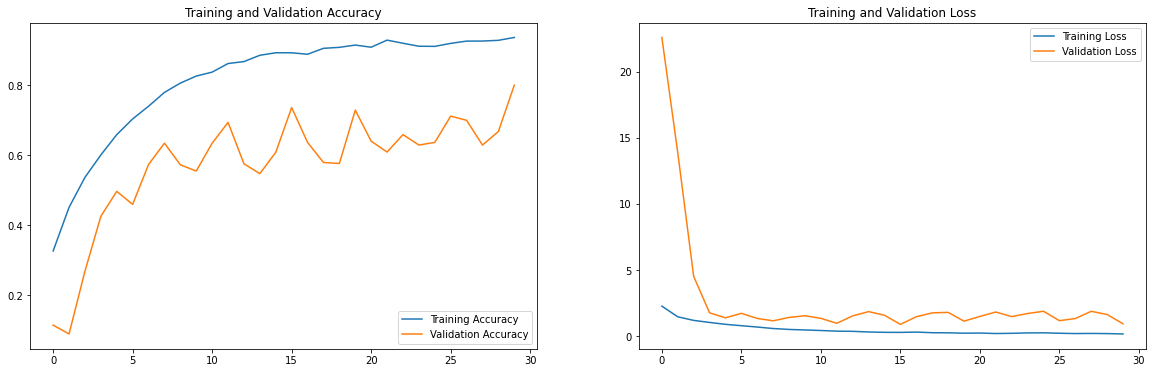

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



- From above plot we can observe that after the multiple changes in model the model is giving more accuracy for both training data and validation data.
- We can observe that now the model is giving around 90 percent of accuracy for training data and 80 percent of accuracy for validation data.
- After we handle the class imbalance and after applying data augmentation and Dropout, there is less overfitting than before, and training and validation accuracy are closer aligned.
- the losses for both training and validation data is decreses.
- This model performs far better than the previous 2 models.